In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='5y', interval='1mo')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-01 00:00:00+09:00,39025.308594,39829.558594,35247.871094,37919.550781,2365000000,0.0,0.0
2024-10-01 00:00:00+09:00,38232.468750,40257.339844,37651.070312,39081.250000,2613600000,0.0,0.0
2024-11-01 00:00:00+09:00,38504.351562,39884.011719,37801.621094,38208.031250,2649300000,0.0,0.0
2024-12-01 00:00:00+09:00,38216.949219,40398.230469,37958.550781,39894.539062,2568500000,0.0,0.0
2025-01-01 00:00:00+09:00,39945.421875,40288.800781,38055.679688,39572.488281,2067700000,0.0,0.0


In [7]:
df0 = ticker.history(period='10y', interval='1mo')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-02-01 00:00:00+09:00,17536.609375,18865.390625,17271.869141,18797.939453,2975400000,0.0,0.0
2015-03-01 00:00:00+09:00,18869.400391,19778.599609,18577.060547,19206.990234,3191800000,0.0,0.0
2015-04-01 00:00:00+09:00,19129.750000,20252.119141,18927.949219,19520.009766,3047400000,0.0,0.0
2015-05-01 00:00:00+09:00,19510.849609,20655.330078,19257.849609,20563.150391,3291500000,0.0,0.0
2015-06-01 00:00:00+09:00,20444.539062,20952.710938,19990.550781,20235.730469,3459500000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-01 00:00:00+09:00,39025.308594,39829.558594,35247.871094,37919.550781,2365000000,0.0,0.0
2024-10-01 00:00:00+09:00,38232.468750,40257.339844,37651.070312,39081.250000,2613600000,0.0,0.0
2024-11-01 00:00:00+09:00,38504.351562,39884.011719,37801.621094,38208.031250,2649300000,0.0,0.0


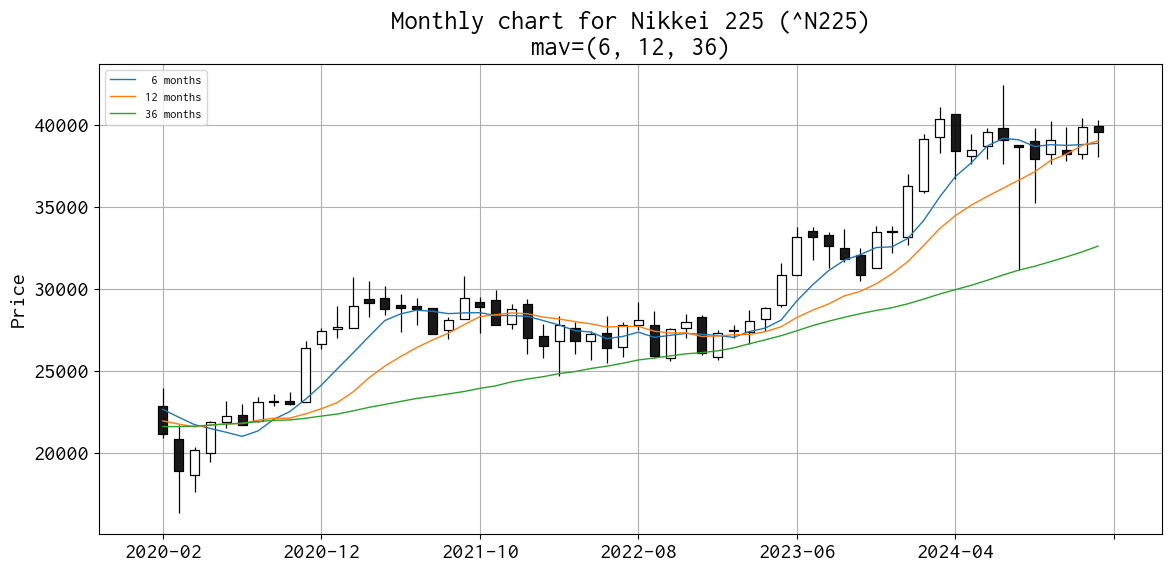

In [11]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ma06 = df0['Close'].rolling(6).mean()
ma12 = df0['Close'].rolling(12).mean()
ma36 = df0['Close'].rolling(36).mean()
apds  = [
    mpf.make_addplot(ma06[df.index], width=1, label=' 6 months', ax=ax),
    mpf.make_addplot(ma12[df.index], width=1, label='12 months', ax=ax),
    mpf.make_addplot(ma36[df.index], width=1, label='36 months', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%Y-%m',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Monthly chart for %s (%s)\nmav=(6, 12, 36)' %(ticker.info['longName'], symbol))
ax.grid()
ax.legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('monthly_chart_n225.png')
plt.show()

In [3]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-01 00:00:00+09:00,39945.421875,40288.800781,38055.679688,39572.488281,2067700000,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2024-12-01 00:00:00+09:00    39894.539062
2025-01-01 00:00:00+09:00    39572.488281
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2024-12-01 00:00:00+09:00           NaN
2025-01-01 00:00:00+09:00   -322.050781
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(12).mean().tail()

Date
2024-09-01 00:00:00+09:00    37148.167806
2024-10-01 00:00:00+09:00    37833.367839
2024-11-01 00:00:00+09:00    38226.796224
2024-12-01 00:00:00+09:00    38762.660156
2025-01-01 00:00:00+09:00    39036.474935
Name: Close, dtype: float64